# Exploratory Data Analysis (MS Big Data and IA) 

For any questions on the course or this notebook: charlotte.laclau@telecom-paris.fr

The purpose of this practical is to make you go through the different eda techniques presented during the course. 
We will work with this lab for several sessions. 

The dataset that we will consider consists of food recipes and recipe reviews covering 18 years of user interactions and uploads on Food.com (formerly GeniusKitchen). It is often used to evaluate machine learning models that perform recipe recommendations. We will mainly study two files : recipe.csv and inter.csv. 

## Organisation of the sessions 


This lab is splitted into several parts. The begining is well guided and has your skills improve, you'll have to be more independent. Mandatory questions are in <span style="color:blue">blue</span> in the subsequent notebook. 
At the end of each part you have a small bonus section. I strongly encourage you to do them (not only for the grade but mostly to improve your python coding skills). 


## Evaluation 

At the end of the course, this lab with be graded. Here are some guidelines about what I expect from you. 
- At the end of our last course, you will upload your notebook along with a `requirement.txt` file on ecampus 
- Your code needs to be carefully commented 
- You have to write a few sentence commenting all the results that you obtained ! I suggest to group results and write intermediate conclusions answering the different questions. 
- I don't want to see any personalized functions or classes in the main notebook. Think modular code! If you want to write specific functions write them in some `utils.py` file. The main notebook code should be as light as possible. 

## Temps d'exécution du TP1 : environ 1 minute

## Part 1 - Univariate Analysis

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import ast
import time

start_time = time.time()

Let us start with the recipe file that contains the reciped submitted to the website describes by several features. 
Below you'll find some code to read the data and print the first three rows. I used the `panda` library for these two steps, meaning that I will be manipulating a dataframe object. 

In [2]:
# Import the data and print the first three rows 
recipe = pd.read_csv("recipe/RAW_recipes.csv")
recipe.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


**Questions** 
- <span style="color:blue">How many recipes are in the file ? </span>
- <span style="color:blue">How many variables do you have. Write the list in a md cell along with the type of the variable for each.</span>
- <span style="color:blue">Are there any missing values in your dataset?</span>

In [3]:
# Utilisation de la taille du jeu de données
print("There are", recipe.shape[0], "recipes")

There are 231637 recipes


List of variables:
    - name : qualitative nominale
    - id : qualitative nominale
    - minutes : quantitative discrète
    - contributor_id : qualitative nominale
    - submitted : quantitative continue
    - tags : qualitative nominale
    - nutrition : quantitative continue
    - n_steps : quantitative discrète
    - steps : qualitative nominale
    - description : qualitative nominale
    - ingredients : qualitative nominale
    - n_ingrédients: quantitative discrète

In [4]:
#print(recipe.isna().sum().sum())
print(recipe.isnull().sum().sum())
print(recipe['minutes'].isnull().sum().sum())

4980
0


Comments: Il y a 4900 valeurs manquantes mais aucune dans la colonne des minutes.

### A example of univariate analysis with *minutes*

Let's start by analysing the feature **minutes**. It corresponds to the number of minutes required to make a given recipe. Here a few questions to answer to 
- What is the average time required to make a recipe on the website ? 
- What are the fastest and the longest recipe, and how long do they take ? 

For both questions we will use some statistics including the mean, the minimum and the maximum. 

In [5]:
# Average time 
avg_time = recipe['minutes'].mean()
print("Average time for recipes: ", avg_time)

Average time for recipes:  9398.546009488984


Odd ? What do you think ? 
Let's convert the maximum into hours and minutes to make it easier to understand. 

In [6]:
# Get hours with floor division 
hours = avg_time // 60

# Get minutes with modulus
minutes = avg_time % 60

print("Average time is {} hours and {} minutes!".format(round(hours),round(minutes)))

Average time is 156 hours and 39 minutes!


Seems a lot ! I prefer to order in that case. Let's see what can cause this very high number by trying to answer the second question.

In [7]:
print('Maximum cooking time :', recipe['minutes'].max(), "minutes")
print('Minimum cooking time :', recipe['minutes'].min(), "minutes")

Maximum cooking time : 2147483647 minutes
Minimum cooking time : 0 minutes


So the longest cooking recipe roughly takes around 4085 years to be made ... while the minumum is 0. Seems like we have some outliers. 

Questions
- <span style="color:blue"> Print the row(s) of the dataframe corresponding to the maximum value for minutes </span>
- <span style="color:blue"> Print the number of row(s) of the dataframe corresponding to the minimum value for minutes </span>
- <span style="color:blue"> Choose an appropriate visualisation to highlight these outliers</span>

In [8]:
recipe.loc[recipe['minutes']==recipe['minutes'].max()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144074,no bake granola balls,261647,2147483647,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8


In [9]:
recipe.loc[recipe['minutes']==recipe['minutes'].max()].shape

(1, 12)

Comments :
Il y a 12 recettes qui voient leur temps de préparation être égal au minimum parmi toutes les recettes.

In [10]:
recipe.loc[recipe['minutes']==recipe['minutes'].min()].head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
2451,acorn magic delights,1712,0,1534,1999-10-01,"['15-minutes-or-less', 'time-to-make', 'course...","[148.4, 15.0, 28.0, 2.0, 3.0, 21.0, 4.0]",13,"['melt the butter or margarine over low heat',...",NaN,"['butter', 'brown sugar', 'pecans', 'all-purpo...",7
3079,albanian byrek,4880,0,1534,1999-11-24,"['15-minutes-or-less', 'time-to-make', 'course...","[354.4, 42.0, 25.0, 59.0, 37.0, 37.0, 2.0]",14,"['prepare the dough with flour , 1 and a half ...","the directions to this are vague, but maybe yo...","['flour', 'water', 'oil', 'vinegar', 'salt', '...",9


{'whiskers': [<matplotlib.lines.Line2D at 0x20670b49750>,
 'caps': [<matplotlib.lines.Line2D at 0x20670b4b310>,
 'boxes': [<matplotlib.lines.Line2D at 0x20670b84c10>],
 'medians': [<matplotlib.lines.Line2D at 0x20650050bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20650051690>],
 'means': []}

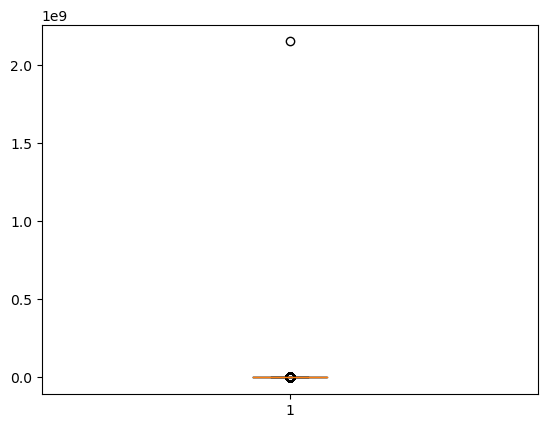

In [11]:
plt.boxplot(recipe['minutes'])

Comments :
Le boxplot n'est pas partinent car il est écrasé par les valeurs maxi et mini qui sont très probablement aberrantes.

### Matplotlib

#### Online Documentation

The [matplotlib.org](https://matplotlib.org/) project website is the primary online resource for the library's documentation. It contains the example galleries, FAQs, API documentation, and tutorials.
You can take a look at the [Gallery](https://matplotlib.org/stable/gallery/index.html) to see the variety of ways one can make figures.

#### Basics of Matplotlib

Let's start by taking a closer look at the anatomy of a Matplolib plot by answering to the following questions. 

1. **What exactly is a Figure?** 

The top level container for all the plot elements. It is the overall window or page that everything is drawn on. The Figure object is instantiated by calling the `figure()` function from the pyplot module. You can create multiple independent Figures. A Figure can have several other things in it, such as a title, which is a centered title to the figure. You’ll also find that you can add a legend and color bar, for example, to your Figure.

2. **What are the Axes?** 

To the figure you add Axes. Axes object is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D visualisation) Axis objects (x and y). Axes can have ticks, labels, etc. associated with it.


**Note** We have previously imported the `pyplot` module of the `matplotlib` library under the alias `plt`.
Pyplot provides the state-machine interface to the underlying plotting library in matplotlib. This means that figures and axes are implicitly and automatically created to achieve the desired plot. For example, calling `plot` from `pyplot` will automatically create the necessary figure and axes to achieve the desired plot.

<img src="img/anatomy_01.png" alt="anatomy of a figure" />

Now that we have identified an abnormal values, what can we do with it? 

*Easy answer*: remove it ! (let's do this for now)

*Fancy answer*: consider this as a missing data input and impute it (keep that for later).

**Question**
- <span style="color:blue">Remove the recipe containing these abnormal values and check the new size of the data</span>
- <span style="color:blue">Plot the variable minutes with a boxplot -- this time you can try seaborn!</span>
- <span style="color:blue">Check the new maximum and minimum</span>
- <span style="color:blue">Print the 5 first observations for which abnormal values are observed. Comment</span>
- <span style="color:blue">Propose a strategy to deal with these observations.</span>
- <span style="color:blue">In total how many observations have you removed?</span>

In [12]:
index_min_recipe = recipe[recipe['minutes'] == 0].index
index_max_recipe = recipe[recipe['minutes'] == recipe['minutes'].max()].index
recipe2 = recipe.drop(index_min_recipe, axis=0)
recipe2 = recipe2.drop(index_max_recipe, axis=0)

In [13]:
print("There are", recipe2.shape[0], "recipes left")

There are 230542 recipes left


<Axes: >

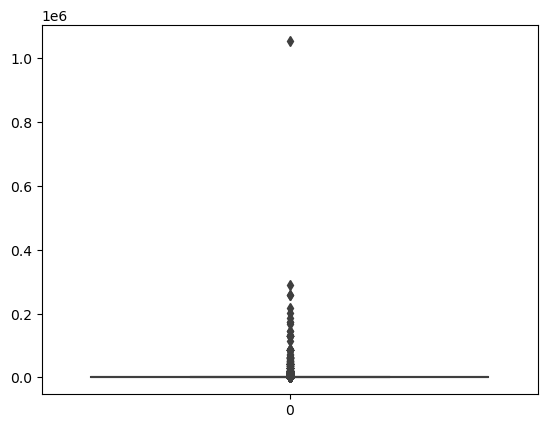

In [14]:
sns.boxplot(recipe2['minutes'])

In [15]:
print('New maximum cooking time :', recipe2['minutes'].max(), "minutes")
print('New minimum cooking time :', recipe2['minutes'].min(), "minutes")

New maximum cooking time : 1051200 minutes
New minimum cooking time : 1 minutes


In [16]:
#verification de la cohérence sur les 1 minute de préparation
print(recipe2.loc[264,'steps'])

['add grenadine and orgeat into a bottom of glass', 'mound ice into glass', 'add white rum and orange curaco', 'add oj , sweet and sour , and pineapple juices', '"float" bacardi dark rum and myers dark rum on top', 'should go in a glass aprox 13- 15 ounces']


<Axes: >

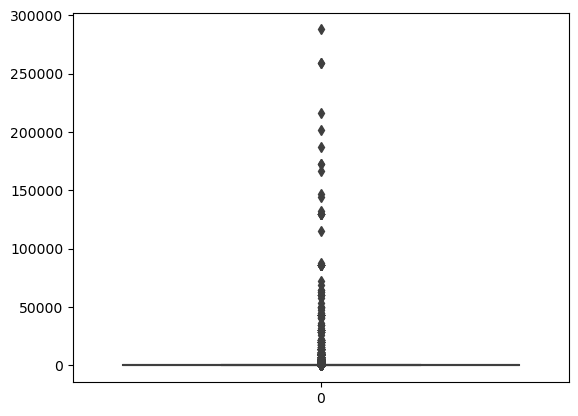

In [17]:
recipe3 = recipe2.drop(recipe2[recipe2['minutes'] == recipe2['minutes'].max()].index, axis=0)
sns.boxplot(recipe3['minutes'])

Comments: 

Concenrnant les recettes qui ont un temps de préparation de 0 minutes, elles ne sont pas pertinentes selon moi car elles peuvent correspondre soit à des recettes longues soit à des recette courtes, mais dans le doute, afin de ne pas fausser la distribution, il est préférable de les retirer.

Concernant la recette de 2 147 483 647 minutes, il s'agit d'une erreur donc on la retirée.	

On s'intresse ensuite aux valeurs hautes de minutes de préparation, après avoir enlevé la valeur très aberrante, on peut observer une seconde recette nécessitant environ 2 ans (10^6 minutes). On peut imaginer que le collaborateur a ajouté le temps de conservation ou un temps de maturation, mais cette valeur écrase de loin le reste des valeurs donc nous pouvons également la supprimer. 

Pour la suite, je décide de conserver que les recettes ayant un temps de préparation inférieur ou égal à 7 jours afin de conserver le temps de préparation max sur une échelle convenable pour, par exemple, une maturation/fermentation/repos plutôt rapide.

En ce qui concerne les recettes très rapides d'un temps de préparation très court dans l'intervalle [0,10] minutes, je ne procède ni à une suppression, ni à une moyenne mais je les conserve toutes car j'estime qu'elles sont cohérentes vu qu'elles peuvent englober, par exemple, des cocktails ou des petit-fours rapides à réaliser.

Ce qu'on pourrait faire pour mieux observer les valeurs de manière générale aurait été de realiser 2 listes :
- recettes courte et moyenne durée (entre 1 minute et 24 heures)
- recettes longue et très longue durée (plus d'un jour)

In [18]:
#Nombre de valeurs supprimées
a = recipe2[recipe2['minutes'] > 10080].index
a.shape

(255,)

<Axes: >

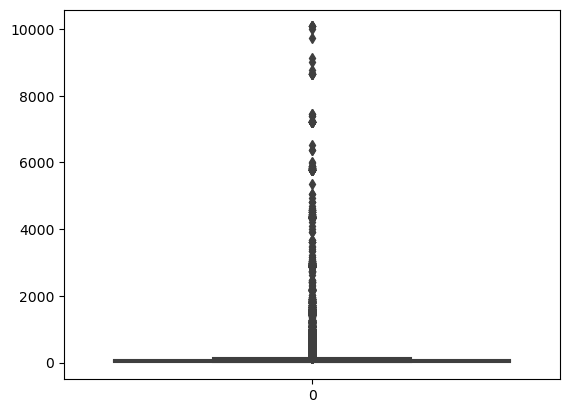

In [19]:
recipe4 = recipe3.drop(recipe3[recipe3['minutes'] > 10080].index, axis=0)
sns.boxplot(recipe4['minutes'])

J'ai 


In [20]:
Obs_removed = recipe.shape[0] - recipe4.shape[0]
print("There are", Obs_removed,"observations removed (", (Obs_removed/recipe.shape[0])*100,"%)")

There are 1350 observations removed ( 0.5828084459736571 %)


In [21]:
recipe4.shape[0]

230287

So in this particular case, boxplot suffers from the very high standard deviation observed for the feature minutes. 
Can we come up with a better visualisation ? 

- **Option 1**: use a log-scale on the y axis the feature
- **Option 2**: remove a lot of values

**Questions**: 
- <span style="color:blue"> Print the values of the different quartile (Q1, median and Q3). What can you conclude for this variable ? </span>
- <span style="color:blue"> Compare the mean with the median. What do you observe?</span>
- <span style="color:blue">Create a subplot with on the left the original boxplot, and on the right the same boxplot but with a log scale on the y-axis.</span> 

#### Subplots

The matplotlib.pyplot.subplots method provides a way to plot multiple plots on a single figure. Given the number of rows and columns, it returns a tuple `(fig, ax`), giving a single figure `fig` with an array of axe `ax`.

There is at least three different ways to create a subplot and to add plots to each created ax (dig in the documentation). 
More details on the different arguments of the `subplots` method [here](https://www.educative.io/edpresso/what-is-a-subplots-in-matplotlib).

In [22]:
# Calcul du Q1, Q2 et Q3
Q1 = np.percentile(recipe4['minutes'], 25)
median = np.percentile(recipe4['minutes'], 50)
Q3 = np.percentile(recipe4['minutes'], 75)
print("Q1:",Q1 , "\nMedian:", median, "\nQ3:",Q3)

Q1: 20.0 
Median: 40.0 
Q3: 65.0


On peut voir que la repartition des temps de préparation des didfférentes recette a une valeur centrale de 40 mintutes donc que 50% des recettes se réalisent en moins de 40 minutes et 50% en plus de 40 minutes.
Il y a 25% des recettes qui sont réalisées entre 1 et 20 minutes
Il y a 25% des recettes qui sont réalisées en plus d'1 heure et 5 minutes

In [23]:
# Calcul de la moyenne
mean = np.mean(recipe4['minutes'])
print("A recipe takes on average", round(mean), "minutes")

A recipe takes on average 81 minutes


On a une moyenne quasiment égale à 2 fois la valeur médiane. Elle est énormément impactée par les valeurs extrèmes et le serait encore plus si on avait pas elevé les recettes de plus de 7 jours de temps de préparation.
C'est bien la preuve que la moyenne est moins robuste que la médiane.

Text(0, 0.5, 'Minutes')

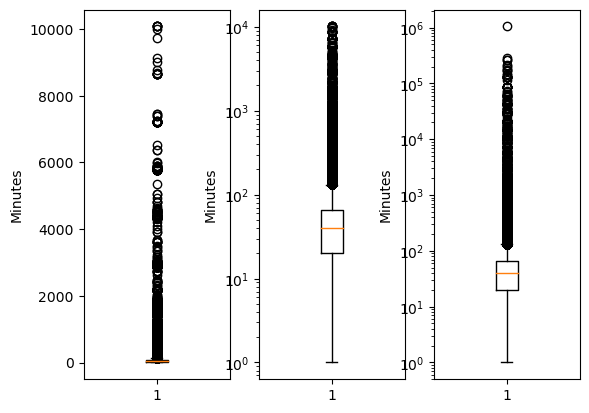

In [24]:
# On fait le plot des subplots avec et sans échelles logarithmiques
fig, ax = plt.subplots(1,3)
ax[0].boxplot(recipe4['minutes'])
ax[0].set_ylabel('Minutes')
ax[1].boxplot(recipe4['minutes'])
ax[1].set_yscale('log')
ax[1].set_ylabel('Minutes')
ax[2].boxplot(recipe2['minutes'])
ax[2].set_yscale('log')
ax[2].set_ylabel('Minutes')

#### Summing-up: 

Comments.

Nous avons d'abord vérifié si toutes les données étaient présentes et si elles étaient cohérentes afin de pouvoir commencer à les exploiter et en tirer des conclusions. Il manquait quelques valeurs mais aucune dans la colonne des minutes sur laquelle nous avons travaillé. Pa ailleurs, nous avons pu observer une incohérence au niveau du temps moyen de réalisation de recette qui était très élevé sur un total de 231 637 recettes.

On a cherché ensuite à localiser des valeurs abérrantes afin d'affiner le modèle. Les premiers max et min ont été supprimés car ne comportaient pas d'informations pertinentes à l'étude (valeur anormalement élevée ou mal renseignée dans le cas du 0). 13 valeurs ont été supprimées à cette étape.

Ensuite on a cherché à déterminer s'il y en avait d'autres mais de manière théorique, toutes les autres valeurs possiblement aberrantes pouvaient être défendue. Cependant, comme on a pu le voir, un trop grand écart entre les valeurs limitrophes peuvent faire grandement varier certains paramètre comme la moyenne. Donc on a décidé de tronquer toutes les recettes dont le temps de réalisation dépassait les 7 jours (10 080 minutes) de manière arbitraire.

Se faisant, on obtient des valeurs de quartiles plutôt correctes selon mon interprétation car un Q1 à 20 minutes, une médiane à 40 minutes et un Q3 à 65 minutes semblent cohérent. La moyenne de 81 minutes cependant reste plutôt éloignée de la médiane même après troncature. Mais supprimer encore plus de données viendrait falsifier la tendance globale et ne serait pas intéressant d'un point de vue exploitation.

Dans le cas que nous avons traité, les valeurs maximales écrasaient sur le graphe les plus petites valeurs, rendant impossible la lecture graphique. Pour pouvoir conserver des valeurs extrèmes tout en ayant une bonne lisibilité des gaphes a été d'intégrer à ces dernier une échele logarithmique

For now let's keep it this way. We will go back to this matter in the feature engineering session.

Now we can complete this analysis with distribution metrics, namely the skewness and the kurtosis coefficient. 

### Univariate Analysis follow-up 

You are now ready to propose your own analysis for the other variables. 
Consider the following variables: **contributor_id, tags, n_steps, n_ingredients and ingredients**. 
The first step is to formulate questions that you would like to answer to using these variables. 

For example, if we take the contributor_id, please answer the following questions using the varying tools seen during the class. 

**Questions**
- <span style="color:blue">How many unique contributors are there?</span> 
- <span style="color:blue">Who is the contributor that posted the most recipes ? And how many recipes did that person posted ? </span>
- <span style="color:blue">What is the average number of recipes posted by users on the website ? </span>

Start with these three questions, then think about questions for the remaining variables mentioned above. 

**"contributor_id" analysis**

In [25]:
# On cherche le nombre de contributeurs uniques
recipe5 = recipe['contributor_id'].unique()
print(recipe5.shape[0], "unique contributors for", recipe['contributor_id'].shape[0], "recipes")

27926 unique contributors for 231637 recipes


In [26]:
# On cherche le contributeur qui a posté le plus de recettes et le nombre de recettes postées
contributor_max = recipe['contributor_id'].mode()
ind = recipe[recipe['contributor_id'] != contributor_max[0]].index
nbr_rec = recipe.drop(ind, axis=0)
print("The best contributor (n°", contributor_max[0],") has posted", nbr_rec.shape[0], "recipes")

The best contributor (n° 89831 ) has posted 3118 recipes


In [27]:
# On cherche le nombre moyen de recettes par contributeur
result = recipe.contributor_id.value_counts()
print("Average nbr of recipes per contributors =",round(result.mean()))

Average nbr of recipes per contributors = 8


.describe() donne la description des différentes valeurs caractéristiques de la distribution

In [28]:
recipe.loc[500,'tags']

"['time-to-make', 'course', 'preparation', 'desserts', 'cakes', '4-hours-or-less']"

**"tags" analysis**

- <span style="color:blue">Which is the proportion of desserts listed amongst the recipes</span>
- <span style="color:blue">Which is the type of recipe which is done the most (most recurrent tag)</span>
- <span style="color:blue">How many recipes are registered as a " 15min or less" recipe? How many recipes really do have a preparation time of 15 minutes or less according to "minutes" registered?</span>
- <span style="color:blue">(Unique tag? counter(list_tag), .most_common)</span>

In [29]:
#ind_dessert=recipe[recipe['tags'] = contributor_max[0]].index
#desserts = recipe[recipe['tags'] == '*desserts*']
#.apply populous_recipe=recipe['tags'].apply(eval)
ind_non_desserts = recipe[~recipe['tags'].str.contains('desserts')].index
desserts = recipe.drop(ind_non_desserts, axis=0)
print(desserts['tags'].count(), "desserts for", len(recipe), "recipes")
print(round((desserts['tags'].count()/len(recipe))*100),"% de desserts")
desserts.loc[8,'tags']

43203 desserts for 231637 recipes
19 % de desserts


"['weeknight', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'pies-and-tarts', 'desserts', 'lunch', 'snacks', 'no-cook', 'refrigerator', 'kid-friendly', 'frozen-desserts', 'pies', 'chocolate', 'dietary', 'inexpensive', 'equipment', 'number-of-servings', 'technique', '4-hours-or-less']"

The most frequent tag is : preparation .


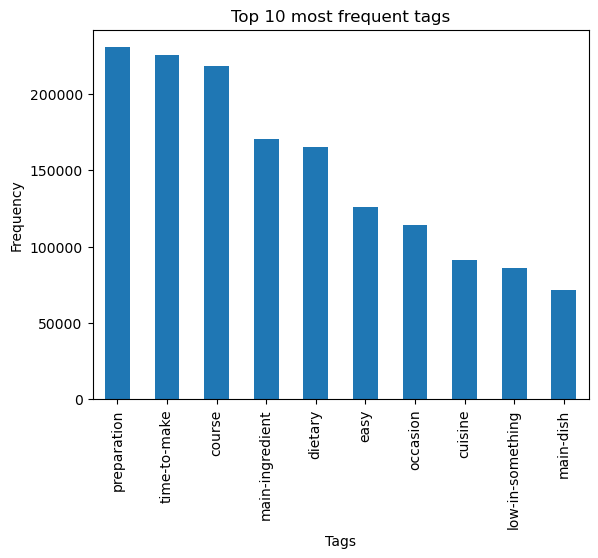

In [30]:
# Trouver le tag le plus fréquent)
tag_count = recipe['tags'].apply(eval)
z = tag_count.explode().value_counts()
print("The most frequent tag is :", z.index[0],".") 

# Histogramme de la fréquence d'apparition des 10 tags les plus fréquents
top_z = z.nlargest(10)
top_z.plot(kind='bar', title='Top 10 most frequent tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()

In [31]:
# On recherche le nombre de recettes avec le tag '15-minutes-or-less'
# On récupère l'index des recettes qui n'ont pas le tag '15-minutes-or-less' et on les retire de recipe
ind_more_than_15 = recipe[~recipe['tags'].str.contains('15-minutes-or-less')].index
less_than_15 = recipe.drop(ind_more_than_15, axis=0)
print("There are", len(less_than_15), "recipes registered with the tag '15-min-or-less'.")

# On récupére toutes les recettes qui ont un temps de préparation inférieur à 15 minutes pour le comparer avec le résultat précédent
ind_more_than_15_true = recipe[recipe['minutes'] > 15].index
less_than_15_true = recipe.drop(ind_more_than_15_true, axis=0)
print("There are", len(less_than_15_true), "recipes with a preparation time <= 15 minutes.")

# On compare les deux résultats
print("Error of", abs(len(less_than_15)-len(less_than_15_true)), "\recipes. It may be due to missing tags (it is supposed that every '15-min-or-less' tag is accurate for each appearance).")

There are 43934 recipes registered with the tag '15-min-or-less'.
There are 43922 recipes with a preparation time <= 15 minutes.
ecipes. It may be due to missing tags (it is supposed that every '15-min-or-less' tag is accurate for each appearance).


In [32]:
# On utilise un dictionnaire pour stocker tous les tags uniques

# On fomatte le nom des clés du dictionnaire de tags pour enlever les caractères spéciaux (un tag se trouvant en début de  chaine aura '[' devant lui, il devient
# donc difficile de le comparer à son occurence sans le '[' pour caractériser son unicité)

chars = {'[': 1, ']': 1, "'": 1}
tags = {}
for i in range(len(recipe)):
    for tag in recipe['tags'][i].split(', '):
        # On formatte le nom des ingrédients pour enlever les caractères spéciaux
        s = tag
        for l in s:
            if l in chars:
                s = s.replace(l, '')
        if s not in tags:
            tags[s] = 1

# Nombre de tags uniques
print("There are", len(tags), "unique tags.")

There are 552 unique tags.


There are more recipes with the '15-min-or-less' tag than recipes with an actual preparation time inferior or equal to 15 minutes (12 more).

Plusieurs cas de figure sont envisageables : 
- Certains utilisateurs ont assigné le tag à des recettes avec des temps de préparation supérieur à 15 minutes
- Certains utilisateur ont tout simplement oublié d'assigner le tag 15min or less à leurs recettes (plus probable)

**"n_steps" analysis**
- <span style="color:blue">Which is the recipe whith the less number of steps ?
- <span style="color:blue">Which is the number of step for which at least 75% of the recipes are above this nbr of steps, 25% -

In [33]:
# Nombre minimum de steps pour une recette
print("Minimum of steps", recipe['n_steps'].min())

# On récupère le nombre de recettes qui ont ce nombre de steps
steps_min = recipe.loc[recipe['n_steps']==recipe['n_steps'].min()].shape
print("There is only", steps_min[0])

Minimum of steps 0
There is only 1


On va supprimer cette valeur qui semble aberrante

In [34]:
# On stock les index des recettes avec le minimum de steps (valeurs aberrantes) et on les supprime
stp_min = recipe[recipe['n_steps'] == recipe['n_steps'].min()].index
recipe6 = recipe.drop(stp_min, axis=0)

# Nouveau nombre de steps minimum
print("New minimum of steps", recipe6['n_steps'].min())

New minimum of steps 1


In [35]:
# Premier quartile du nombre d'étapes dans recipe6
Q1 = np.percentile(recipe6['n_steps'], 25)

# Médiane du nombre d'étapes dans recipe6
median2 = np.percentile(recipe6['n_steps'], 50)

# Troisième quartile du nombre d'étapes dans recipe6
Q3 = np.percentile(recipe6['n_steps'], 75)

print("Q1:",Q1 , "\nMedian:", median2, "\nQ3:",Q3)

Q1: 6.0 
Median: 9.0 
Q3: 12.0


75% des recettes ont plus de 6 étapes, 25% des recettes ont plus de 12 étapes, et la médiane se situe à 9 étapes

**"ingredients" analysis**
- <span style="color:blue">How many recipes include butter or flour? Butter and flour?</span>
- <span style="color:blue">How many unique ingredients?</span>

In [36]:
# On conserve dans butter_recipes les recettes contenant le mot 'butter'
butter_recipes = recipe[recipe['ingredients'].str.contains('butter')]
print("There are", len(butter_recipes), "recipes with butter in it.")

# On conserve dans flour_recipes les recettes contenant le mot 'flour'
flour_recipes = recipe[recipe['ingredients'].str.contains('flour')]
print("There are", len(flour_recipes), "recipes with flour in it.")

# On conserve dans flour_and_butter_recipes les recettes contenant le mot 'flour' ET le mot 'butter'
flour_and_butter_recipes = recipe[recipe['ingredients'].str.contains(
    'flour') & recipe['ingredients'].str.contains('butter')]
print("There are", len(flour_and_butter_recipes),
      "recipes with flour AND butter in it.")

There are

 72526 recipes with butter in it.
There are 57109 recipes with flour in it.
There are 33044 recipes with flour AND butter in it.


In [37]:
# On utilise un dictionnaire pour stocker tous les ingrédients uniques exactement comme pour le comptage des ingrédients
# On fomatte le nom des clés du dictionnaire d'ingrédients pour enlever les caractères spéciaux comme pour les tags

chars = {'[': 1, ']': 1, "'": 1}
ingredients = {}

for i in range(len(recipe)):
    for ingredient in recipe['ingredients'][i].split(', '):
        # On formatte le nom des ingrédients pour enlever les caractères spéciaux
        s = ingredient
        for l in s:
            if l in chars:
                s = s.replace(l, '')
        if s not in ingredients:
            ingredients[s] = 1

# Nombre d'ingrédients uniques
print("There are", len(ingredients), "unique ingrédients.")

There are 14906 unique ingrédients.


**"nutrition" analysis**

*The nutrition column is composed of : Calories, total fat, sugar %, sodium %, protein %, satured fat %, carbohydrate %*


- <span style="color:blue">Which is the least caloric desert ? The most caloric ?</span>

In [38]:
type(recipe['nutrition'])

pandas.core.series.Series

In [39]:
# Séparer les 7 floats en 1 float par colonne
nutri_values = recipe['nutrition'].str.strip('[]').str.split(',', expand=True).astype(float)
nutri_values = nutri_values.rename(columns={0: 'Calories',
                         1: 'Total Fat', 2: 'Sugar', 3: 'Sodium', 4: 'Protein', 5: 'Saturated Fat', 6: 'Carbohydrates'})
# Afficher le nouveau DataFrame
print(nutri_values.shape)

# Garder que les desserts
nutri_values2 = nutri_values.drop(ind_non_desserts, axis=0)
print(nutri_values2.head(2))

#On récupère les desserts les moins caloriques dans la liste
least_cal_ind = nutri_values2[nutri_values2['Calories'] == nutri_values2['Calories'].min()].index
least_cal_des = recipe.loc[least_cal_ind]['name']
print("The least caloric dessert(s) is(are) the:", least_cal_des)

(231637, 7)
    Calories  Total Fat   Sugar  Sodium  Protein  Saturated Fat  Carbohydrates
8     4270.8      254.0  1306.0   111.0    127.0          431.0          220.0
11     734.1       66.0   199.0    10.0     10.0          117.0           28.0
The least caloric dessert(s) is(are) the: 160167               pineapple frozen bars
172680    reduced fat cake  from boxed mix
Name: name, dtype: object


In [40]:
# On récupère les desserts les plus caloriques dans la liste
most_cal_ind = nutri_values2[nutri_values2['Calories'] == nutri_values2['Calories'].max()].index
most_cal_des = recipe.loc[most_cal_ind]['name']
print("The most caloric dessert(s) is(are) the:", most_cal_des)

The most caloric dessert(s) is(are) the: 137181    mmmmmmmmilky way cake
Name: name, dtype: object


BIVARIATE ANALYSIS

 - Are the longest recipes also the ones that have the more steps ? 

In [41]:
# Je travaille avec le dataframe dans lequel j'ai supprimé les recettes de plus de 7jours de temps de préparation
length_recipes = recipe4['minutes']
nb_of_steps = recipe4['n_steps']
print(len(length_recipes), len(nb_of_steps))

230287 230287


In [42]:
# Je stock le nombre d'étapes de toutes les recettes qui ont le temps de préparation minimum
repartition_minutes_min = recipe4.loc[recipe4['minutes'] == recipe4['minutes'].min()]['n_steps']

# Je regarde le nombre d'étapes max stocké pour une recette de temps de préparation minimum
print(f"There is a maximum of {repartition_minutes_min.max()} steps for a recipe of {recipe4['minutes'].min()} minute(s) duration")

# Quelle est le nombre d'étapes max pour une recettte overall, quel est son temps de préparation ?
print(f"The recipe which has {recipe4['n_steps'].max()} steps, takes {recipe4.loc[recipe4['n_steps'] == recipe4['n_steps'].max()]['minutes']} minutes to be prepared")

There is a maximum of 49 steps for a recipe of 1 minute(s) duration
The recipe which has 145 steps, takes 78633    210
Name: minutes, dtype: int64 minutes to be prepared


Text(0.5, 0, 'length_recipes')

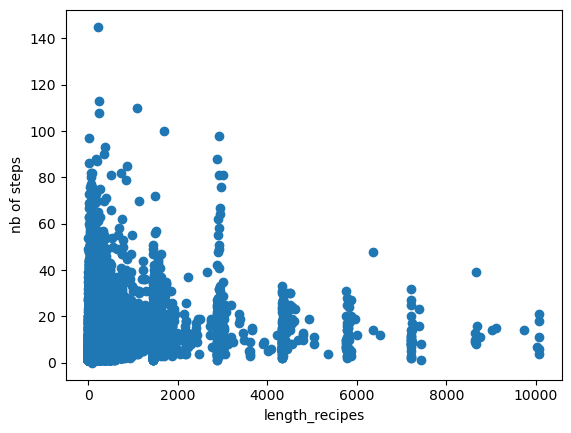

In [43]:
# Scatter plot de la répartition du nombre d'étapes en fonction du temps de préparation
plt.scatter(length_recipes,nb_of_steps)
plt.ylabel('nb of steps')
plt.xlabel('length_recipes')

In [44]:
# Coefficient de corrélation de Pearson
corr, p_value = pearsonr(length_recipes, nb_of_steps)
print("Corrélation de Pearson :", corr)

# Coefficient de corrélation de Spearman
corr, p_value = spearmanr(length_recipes, nb_of_steps)
print("Corrélation de Spearman :", corr)

Corrélation de Pearson : 0.09494836975930177
Corrélation de Spearman : 0.406411919155735


D'après le scatterplot et le calcul du coefficient de Pearson assez proche de 0, on peut déduire qu'il n'y a quasiment pas de relation linéaire évidente entre les deux variables.

Le coefficient de Spearman, quant à lui, est légèrement plus élevé que celui de Pearson bien qu'il reste proche de 0. On peut donc dire qu'il permet de dénoter une correlation légèrement plus forte entre les deux variables, positive et non linéaire.

En somme, on ne peut pas vraiment établir de corrélation claire entre le nombre d'étape d'une recette et son temps de préparation pour les recettes < 7jours, mais s'il en existe une petite, elle serait non-linéaire.

Le résultat obtenu peut dépendre de paramètres tels que le traitement des outliers, des missing values, du type de recettes que l'on regarde, etc...

 - Is there a link between the ingredients and the nutrition score of reciepes ?

In [45]:
# On va maintenant chercher à savoir s'il y a une corrélation entre les ingrédiens et le nutrition score (j'ai pris en compte que les calories mais on suppose que les calories sont étroitement corrélées avec les autres valeurs nutritionnelles)
# On crée la colonne calories à joindre au dataframe qui va remplacer la colonne nutrition
recipe_bv = recipe
nutri_values_bv = recipe['nutrition'].str.strip('[]').str.split(',', expand=True).astype(float)
nutri_values_bv = nutri_values_bv.rename(columns={0: 'Calories',
                         1: 'Total Fat', 2: 'Sugar', 3: 'Sodium', 4: 'Protein', 5: 'Saturated Fat', 6: 'Carbohydrates'})

recipe_bv['nutrition'] = nutri_values_bv['Calories']


In [46]:
# On remplace toutes les valeurs de calories > à 10 000 par 10 000 pour enlever les outliers et avoir plus bas une meilleure visualisation (pour ajuster si nécessaire)
recipe_bv['nutrition'] = recipe_bv['nutrition'].apply(lambda x: 20000 if x > 20000 else x)

In [47]:
# On prend au hasard n recettes pour lesquelles on va extraire les ingrédients uniques
n = 2 # Pour avoir plus d'ingrédients à analyser, on augmente n
random_ind = np.random.randint(0, len(recipe_bv), n)
print(random_ind)

chars = {']': 1, '[': 1, "'": 1}
ingrdts = {}
for i in random_ind:
    for ingrdt in recipe_bv['ingredients'][i].split(', '):
        # On formatte le nom des éléments de la listes à intégrer dans le dictionnaire d'ingrédients unique sur n recettes
        s = ingrdt
        for l in s:
            if l in chars:
                s = s.replace(l, '')
        if s not in ingrdts:
            ingrdts[s] = 1

print(len(ingrdts), "unique ingredients have been extracted")

[177381 144079]
20 unique ingredients have been extracted


In [48]:
# On crée une liste par ingrédient avec nom formatté
a =[]
D_ingredients = {}
for j in ingrdts.keys():
    D_ingredients[j] = []

In [49]:
# Pour chaque liste dans D_ingredients, on va stocker les valeurs de nutrition correspondantes à l'ingrédient
for k in range(len(recipe_bv)):
    # On transforme la chaine de caractère en liste de str (formule de chatgpt)
    ingredients_list = ast.literal_eval(recipe_bv['ingredients'][k])

    # On formate le nom des ingrédients et on remplace dans ingredients_list
    for ing in ingredients_list:
        s = ing
        for l in s:
            if l in chars:
                s = s.replace(l, '')
        ingredients_list[ingredients_list.index(ing)] = s
    
    # On stocke les valeurs de nutrition correspondantes à l'ingrédient
    for ingrdt in ingredients_list:
        if ingrdt in D_ingredients.keys():
            D_ingredients[ingrdt].append(recipe_bv['nutrition'][k])

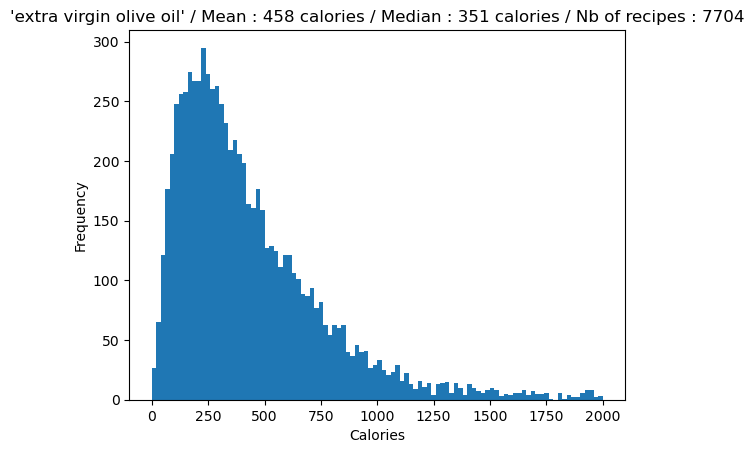

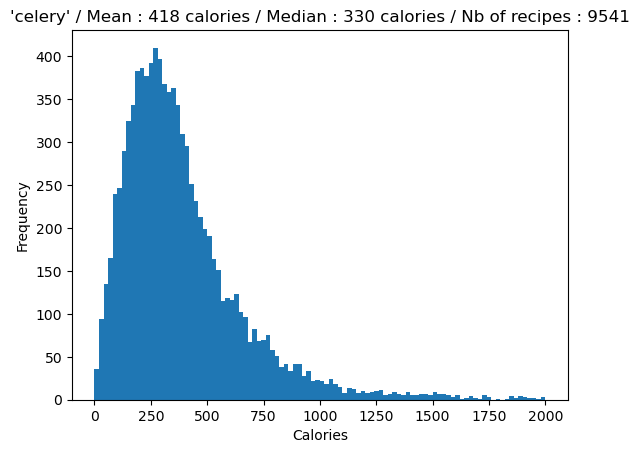

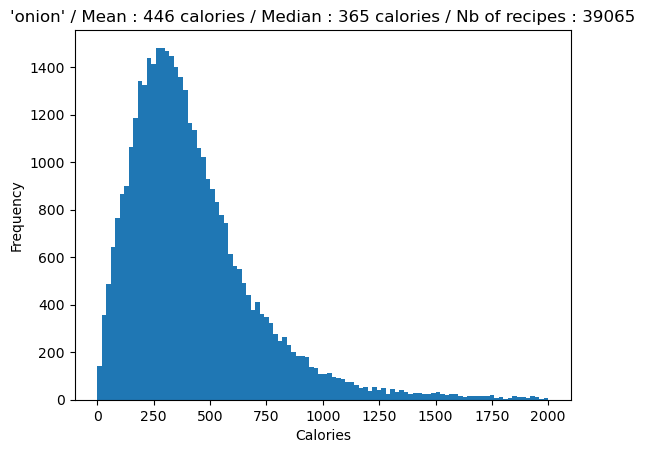

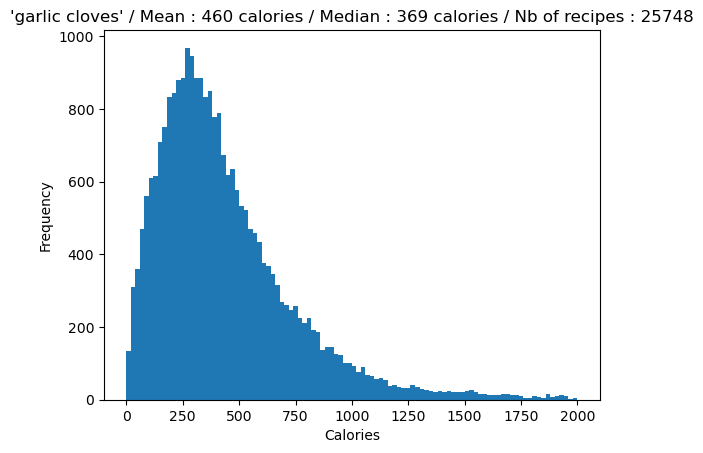

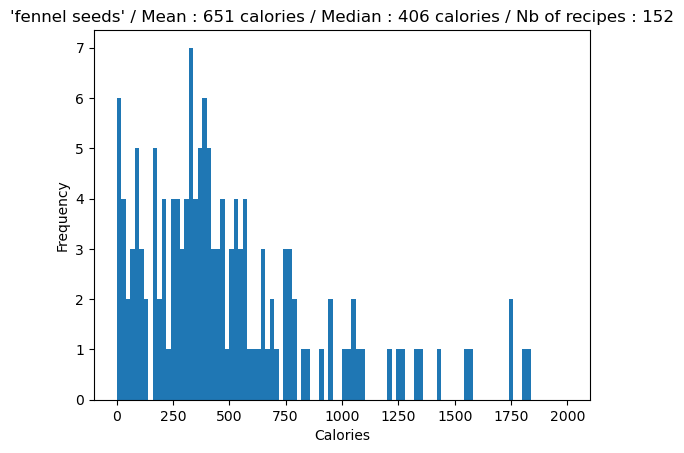

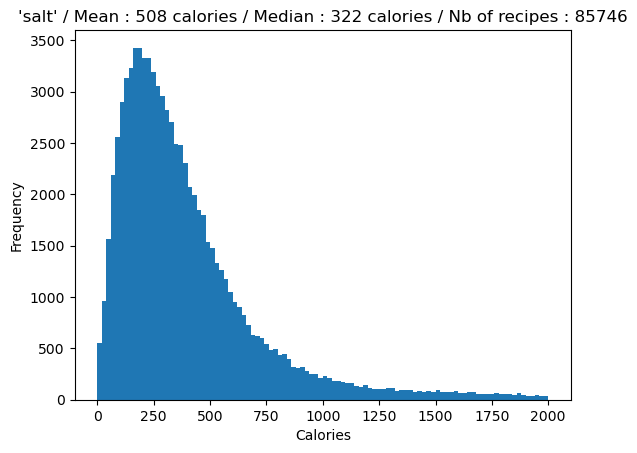

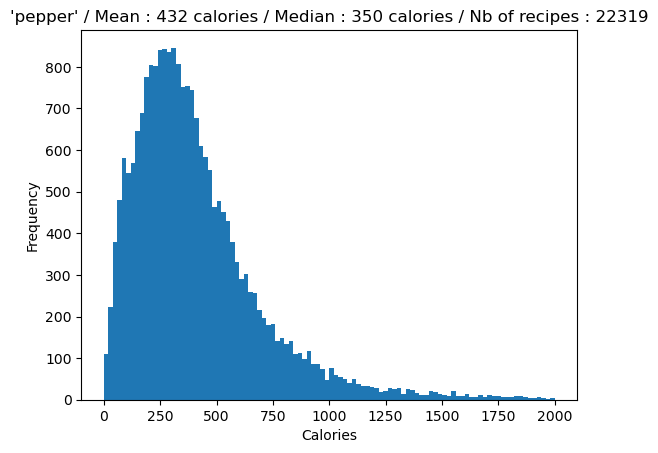

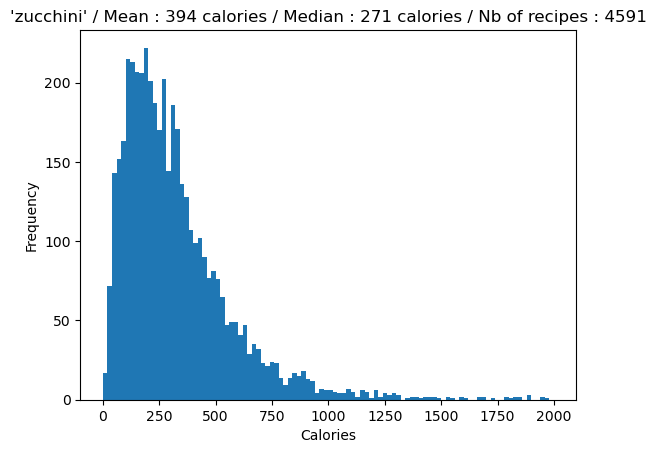

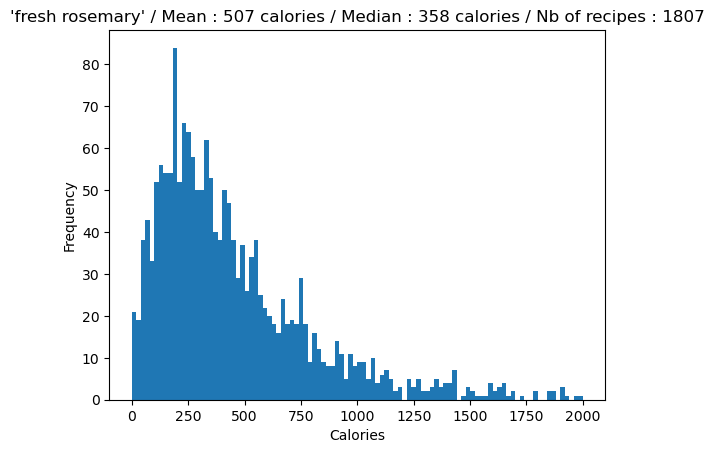

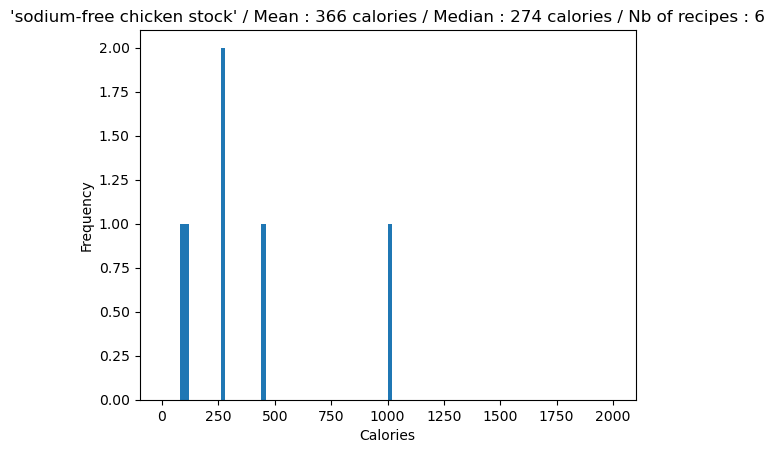

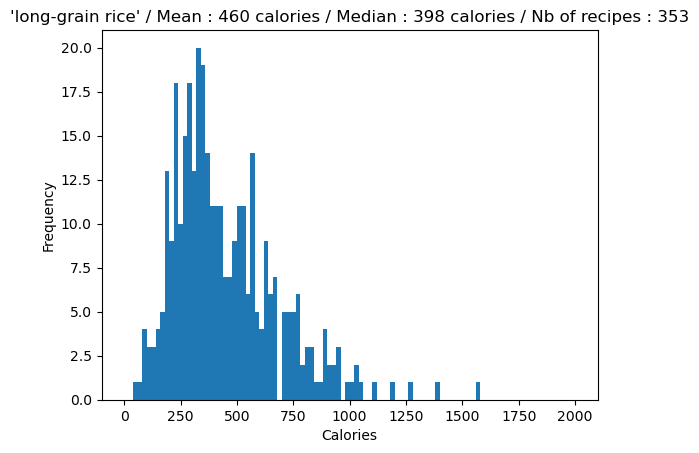

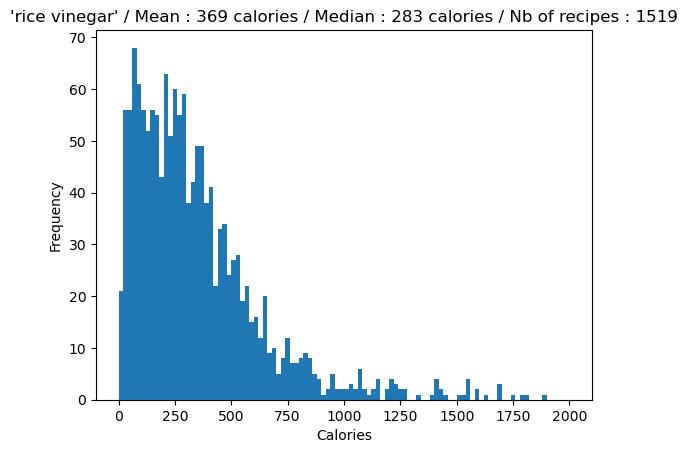

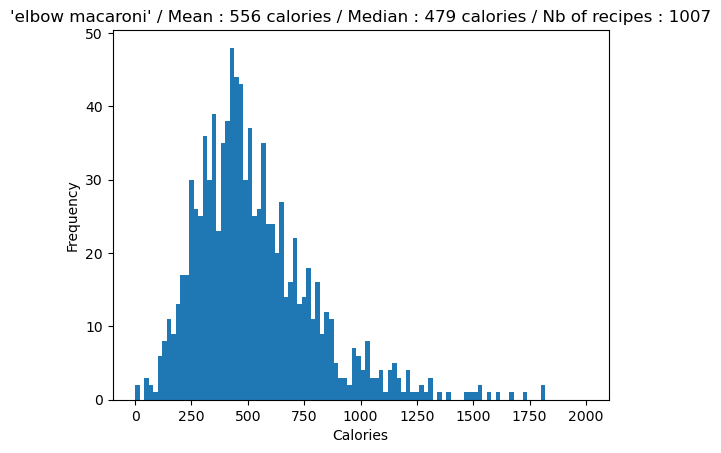

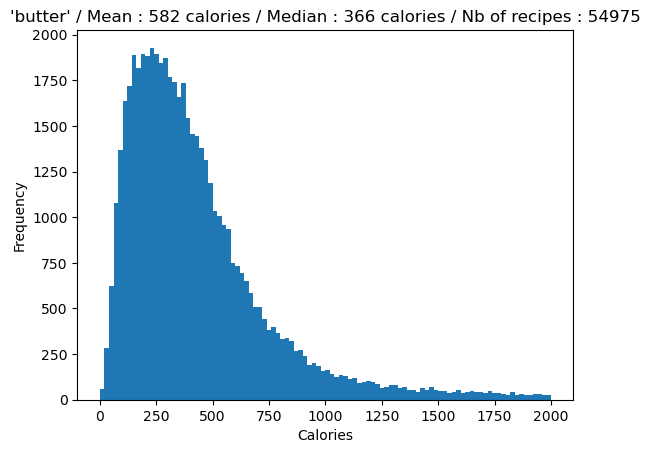

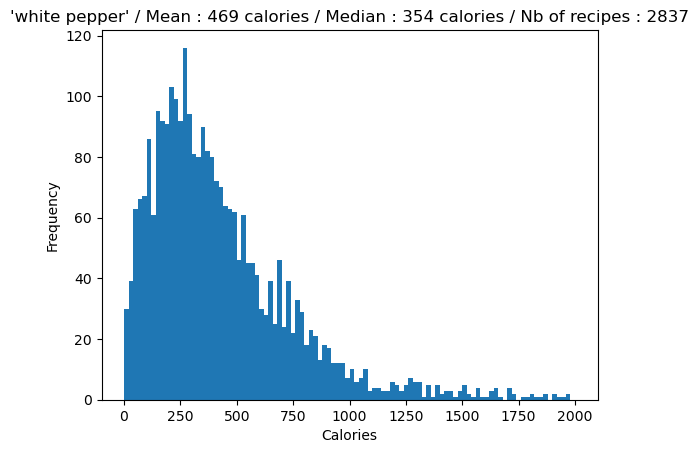

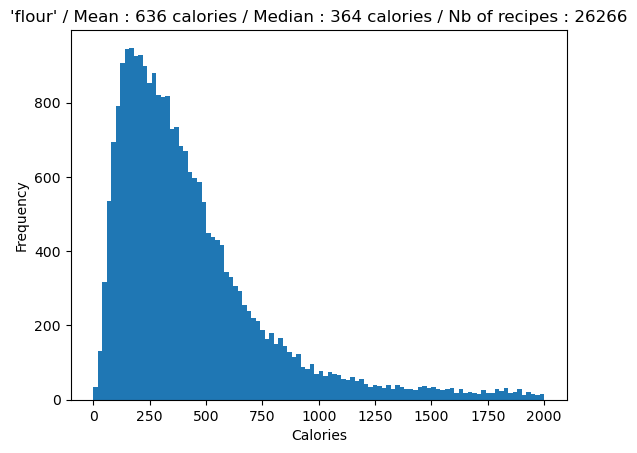

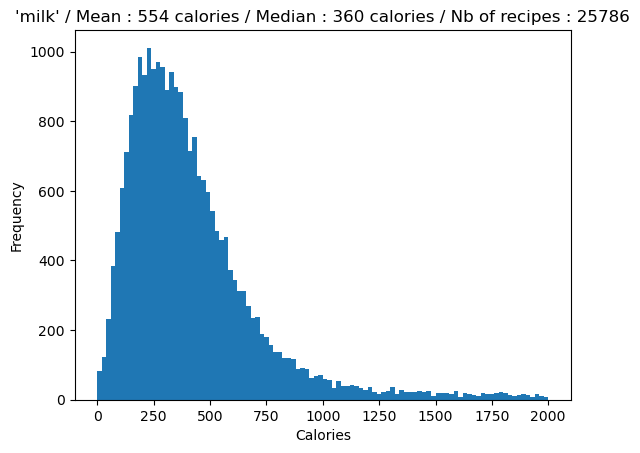

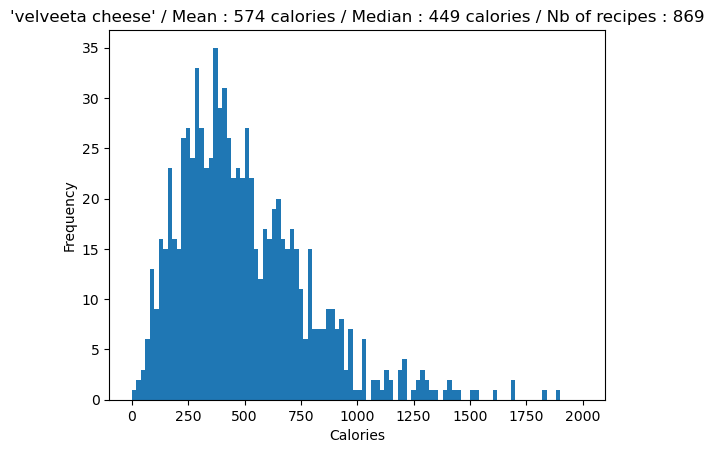

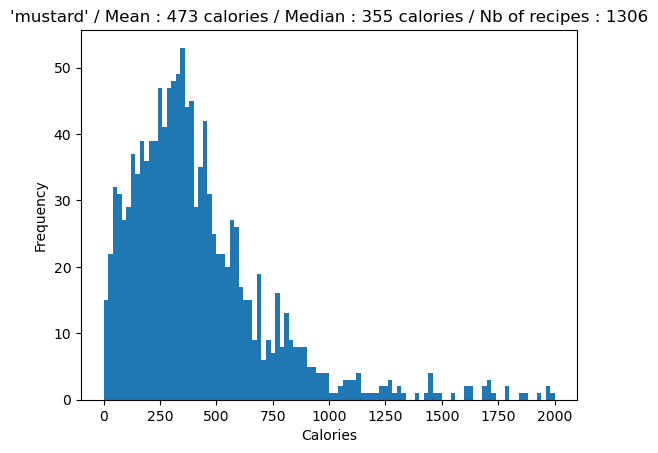

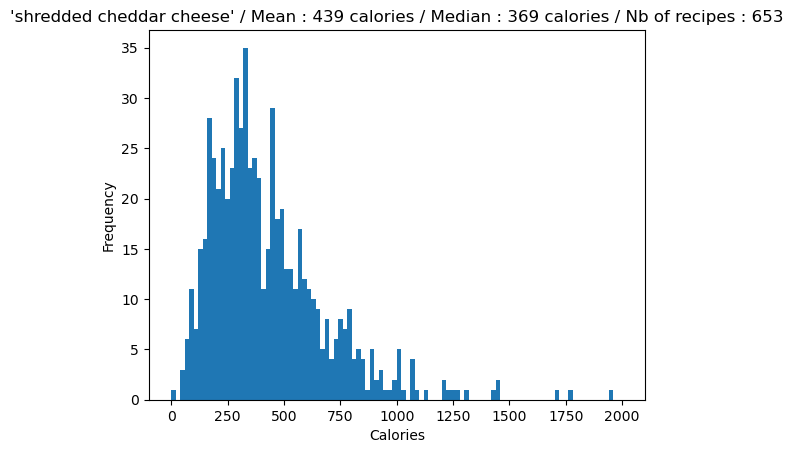

In [50]:
# On crée ensuite un histograme pour chaque élément de D_ingredients
for key in D_ingredients.keys():
    plt.hist(D_ingredients[key], bins=100, range=(recipe_bv['nutrition'].min(), 2000))
    plt.title(f"'{key}' / Mean : {round(np.mean(D_ingredients[key]))} calories / Median : {round(np.median(D_ingredients[key]))} calories / Nb of recipes : {len(D_ingredients[key])}")    
    plt.xlabel('Calories')
    plt.ylabel('Frequency')
    plt.show()

On obtient un certain nobre d'histogramme qui nous permettent de visualiser la distribution des indices caloriques des recette utilisant chaque ingrédient unique qu'on a sélectionné au hasard au début de l'étude. 

La question était de savoir s'il existe un lien entre les ingrédients et le score de nutrition (j'ai considéré ici le nombre de calories).

Pour répondre à la question, on peut observer les résultats des ingrédients qui ont le plus été utilisés pour avoir une meilleure répartition des données. Étant donné la prise aléatoire des ingrédients, je ne peux pas conclure  sur l'ensemble de ces derniers, néanmois on peut tout de même constater que la moyenne/médiane de l'indice calorique pour les recettes de certains aliments sont plus élevée ou plus faibles que d'autres : les recettes qui utilisent du beurre, sont généralement plus caloriques que celles qui utilisent de la carotte (moyenne de 583 > 403, médiane 378 > 306)

Il apparaît donc qu'il existe bien un lien entre les ingrédients et le score de nutrition. On peut par ailleurs noter qu'on n'observe pas non plus d'écarts gigantesques entre les resultats obtenus (pour les ingrédients observés)

On peut aussi se demander s'il existe des correlation entre certiains ingrédients ou la quantité d'ingrédients utilisés pour la recette.

On va donc observer s'il y a une relation entre le nombre d'ingrédients et le score de nutrition.

 - Is there a relationship between the nutrition score and the numbre of ingredients ?

In [51]:
nb_of_ingrdts = recipe_bv['n_ingredients']
calories = recipe_bv['nutrition']

Text(0, 0.5, 'nb_of_ingrdts')

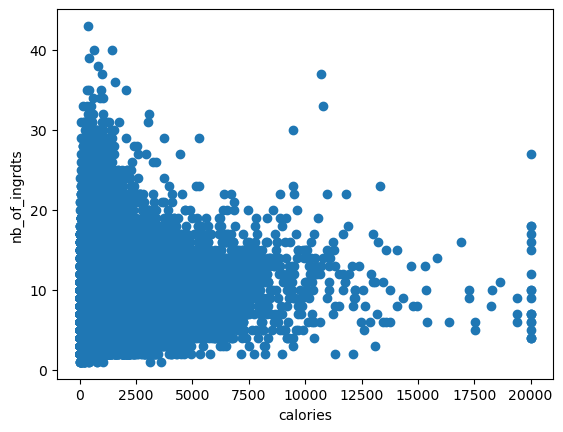

In [52]:
plt.scatter(calories, nb_of_ingrdts)
plt.xlabel('calories')
plt.ylabel('nb_of_ingrdts')

In [53]:
# Nombre max de calories
print("Maximum of calories :", calories.max())
# Nombre min de calories
print("Minimum of calories :", calories.min())
# Nombre max d'ingrédients
print("Maximum of ingredients :", nb_of_ingrdts.max())
# Nombre min d'ingrédients
print("Minimum of ingredients :", nb_of_ingrdts.min())

Maximum of calories : 20000.0
Minimum of calories : 0.0
Maximum of ingredients : 43
Minimum of ingredients : 1


In [54]:
# Calcul du coefficient de Pearson
corr, p_value = pearsonr(calories, nb_of_ingrdts)
print("Pearson coef :", corr)

# Calcul du coefficient de Spearman
corr, p_value = spearmanr(calories, nb_of_ingrdts)
print("Spearman coef :", corr)

Pearson coef : 0.10541783202960456
Spearman coef : 0.24926685740473112


De la même façon que pour la première question de l'analyse bivariée, on constate qu'il n'y a aucune corélation linéaire apparente entre les deux variables. Le coefficient de Spearman relève qu'il n'y a pas l'air non plus d'avoir une corrélation non-linéaire entre les deux variables.

In [55]:
# Calcul du temps d'exécution total
end_time = time.time()
execution_time = end_time - start_time
print(f"Overall execution time : {execution_time//60} minutes and {round(execution_time%60)} seconds")

Overall execution time : 1.0 minutes and 11 seconds
